## Obtaining the FASTA or SMILES sequences for each protein or chemical
This notebook maps each chemical or protein id with its respective SMILES or FASTA sequence. This information will be used later to calculate molecular feature descriptors for both types of molecules. Proteins that are too small or too large are also filtered out of the dataset.

In [2]:
import pandas as pd

In [3]:
chemSMILES = pd.read_table('chemicals.v5.0.tsv.gz') 

In [3]:
chemSMILES.head(5) 
# has info for all the (human) chemicals in STITCH

,chemical,name,molecular_weight,SMILES_string
0,CIDs00000001,acetylcarnitine,203.235580,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C
1,CIDs00000003,"2,3-dihydro-2,3-dihydroxybenzoate",156.136020,C1=CC(C(C(=C1)C(=O)O)O)O
2,CIDs00000004,1-aminopropan-2-ol,75.109660,CC(CN)O
3,CIDs00000005,3-amino-2-oxopropyl phosphate,169.073082,C(C(=O)COP(=O)(O)O)N
4,CIDs00000006,DNCB,202.552020,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl


In [4]:
len(chemSMILES) 

116224359

In [4]:
protchem_binding = pd.read_table('protchem_binding.tsv') 
# result from last time: contains binding protein-chemical pairs

In [6]:
protchem_binding.head(5) 

,Unnamed: 0,chemical,protein,experimental,prediction,database,textmining,combined_score
0,0,CIDs23627457,9606.ENSP00000353915,191,0,0,0,191
1,1,CIDs44408029,9606.ENSP00000256906,521,0,0,0,521
2,2,CIDs23590374,9606.ENSP00000267377,159,170,0,0,282
3,3,CIDs73351473,9606.ENSP00000295589,267,0,0,0,267
4,4,CIDs10666045,9606.ENSP00000336630,209,0,0,0,209


In [5]:
chem_binding = protchem_binding.drop(['Unnamed: 0', 'protein', 'experimental', 'prediction', 'database', 'textmining', 'combined_score'],axis=1)
# returns only the chemical column

In [6]:
chem_binding.head(3) 

,chemical
0,CIDs23627457
1,CIDs44408029
2,CIDs23590374


In [7]:
chem_binding = chem_binding.drop_duplicates() 
# since data was pairs, a chemical can interact with multiple proteins and therefore be listed more than once

In [16]:
len(chem_binding) 
# much smaller than the ~8.7 mil pairs we started with

558340

In [8]:
testdup = chem_binding.duplicated()   

In [9]:
any(testdup) 

False

In [10]:
chemSMILES_binding = pd.merge(chem_binding, chemSMILES, on=['chemical']) 
# merges df of our unique binding chemicals with df of all human chemicals to get SMILES/other info for binding chemicals
# default is inner merge
# LONG RUNTIME

In [11]:
len(chemSMILES_binding) 
# since binding chemicals are a subset of all the human chemicals, an inner merge should give same number as binding chemicals

558326

In [12]:
chemSMILES_binding.head(5) 

,chemical,name,molecular_weight,SMILES_string
0,CIDs23627457,AGN-PC-046FNF,601.15812,CC1=CC=C(C=C1)S(=O)(=O)N2C(C3=CC=CC=C3C4=CC=CC...
1,CIDs44408029,AGN-PC-075ZUT,410.59542,C1CCN(CC1)CC2=CC=C(C=C2)OCCCCN3CCC(CC3)CC4=CN=CN4
2,CIDs23590374,CHEMBL65905,491.58686,CCCCC1=NN(C(=O)N1CC2=CC=C(C=C2)C3=CC=CC=C3C4=N...
3,CIDs73351473,CHEMBL2369384,889.05456,CCCOCC(CC(C)C)NC(=O)C(CC1=CN=CN1)NC(=O)CNC(=O)...
4,CIDs10666045,AGN-PC-0N8H9H,357.44998,CN1CCN(CC1)CCCNC(=O)N2C3=CC=CC=C3N(C2=O)C4CC4


In [14]:
chemSMILES_binding = chemSMILES_binding.drop(['name', 'molecular_weight'], axis=1)  
# drops unneeded columns

In [16]:
chemSMILES_binding.columns = ['chemical', 'SMILES'] 
# renames columns

In [17]:
chemSMILES_binding.head(3) 

,chemical,SMILES
0,CIDs23627457,CC1=CC=C(C=C1)S(=O)(=O)N2C(C3=CC=CC=C3C4=CC=CC...
1,CIDs44408029,C1CCN(CC1)CC2=CC=C(C=C2)OCCCCN3CCC(CC3)CC4=CN=CN4
2,CIDs23590374,CCCCC1=NN(C(=O)N1CC2=CC=C(C=C2)C3=CC=CC=C3C4=N...


In [18]:
chemSMILES_binding.to_csv('chemSMILES_binding.tsv', sep='\t') 
# exports as tsv

In [19]:
from Bio import SeqIO
# after installing Biopython...

In [20]:
with open('9606.protein.sequences.v10.5.fa') as fasta_file:
    protIDs = []
    sequences = []
    lengths = [] 
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):
        protIDs.append(str(seq_record.id)) 
        sequences.append(str(seq_record.seq))
        lengths.append(len(seq_record.seq)) 
# parses FASTA file and sends output to lists (of IDs, sequences, and lengths of sequences) 

In [21]:
s1 = pd.Series(protIDs, name='protein')
s2 = pd.Series(sequences, name='FASTA')
s3 = pd.Series(lengths, name='length') 
# takes each list and turns it into a pandas series

In [22]:
protseq = pd.DataFrame(dict(protein=s1, FASTA=s2, length=s3)) 
# first turns the series into entries of a dictionary and then turns this dictionary into a dataframe with each of the series as a column

In [23]:
protseq

,FASTA,length,protein
0,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,180,9606.ENSP00000000233
1,MFPFYSCWRTGLLLLLLAVAVRESWQTEEKTCDLVGEKGKESEKEL...,277,9606.ENSP00000000412
2,MSSQVVGIEPLYIKAEPASPDSPKGSSETETEPPVALAPGPAPTRC...,423,9606.ENSP00000000442
3,MTAEEMKATESGAQSAPLPMEGVDISPKQDEGVLKVIKREGTGTEM...,459,9606.ENSP00000001008
4,MLFEGLDLVSALATLAACLVSVTLLLAVSQQLWQLRWAATRDKSCK...,512,9606.ENSP00000001146
5,MSVLLRSGLGPLCAVARAAIPFIWRGKYFSSGNEPAENPVTPMLRH...,441,9606.ENSP00000002125
6,MRPQELPRLAFPLLLLLLLLLPPPPCPAHSATRFDPTWESLDARQL...,467,9606.ENSP00000002165
7,MAALLLGAVLLVAQPQLVPSRPAELGQQELLRKAGTLQDDVRDGVA...,307,9606.ENSP00000002596
8,MLVAGLLLWASLLTGAWPSFPTQDHLPATPRVRLSFKELKATGTAH...,785,9606.ENSP00000002829
9,MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSA...,1480,9606.ENSP00000003084


In [24]:
prot_binding = protchem_binding.drop(['Unnamed: 0', 'chemical', 'experimental', 'prediction', 'database', 'textmining', 'combined_score'],axis=1) 
# returns only the protein column

In [25]:
prot_binding.head(3) 

,protein
0,9606.ENSP00000353915
1,9606.ENSP00000256906
2,9606.ENSP00000267377


In [26]:
prot_binding = prot_binding.drop_duplicates() 
# since pairs, a protein can interact with multiple chemicals so can be repeated in df; this removes duplicates

In [27]:
testdup = chem_binding.duplicated() 

In [28]:
any(testdup) 

False

In [29]:
len(prot_binding) 
# only this many unique proteins out of the 8.7 mil pairs

10324

In [239]:
protseq_binding = pd.merge(prot_binding, protseq, on=['protein']) 
# merges df of unique binding proteins with the df containing all human proteins and their FASTA sequences and lengths
# result is df with FASTA and lengths for our binding proteins
# default is inner merge

In [233]:
len(protseq_binding) 
# matches number of unique proteins

10324

In [240]:
protseq_binding.head(3) 

,protein,FASTA,length
0,9606.ENSP00000353915,MDKLDANVSSEEGFGSVEKVVLLTFLSTVILMAILGNLLVMVAVCW...,428
1,9606.ENSP00000256906,MPDTNSTINLSLSTRVTLAFFMSLVAFAIMLGNALVILAFVVDKNL...,390
2,9606.ENSP00000267377,MFPNGTASSPSSSPSPSPGSCGEGGGSRGPGAGAADGMEEPGRNAS...,391


In [35]:
protseq_binding.to_csv('protseq_binding.tsv', sep='\t') 
# later this is overwritten because we only include proteins of certain length, but can be used to save protseq_binding at this point

In [48]:
%matplotlib inline

In [51]:
import numpy as np

Text(0,0.5,u'Frequency')

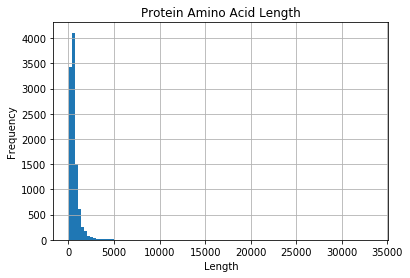

In [241]:
hist_plot = protseq_binding['length'].hist(bins=100) 
hist_plot.set_title('Protein Amino Acid Length')
hist_plot.set_xlabel('Length')
hist_plot.set_ylabel('Frequency') 
# histogram of protein AA length
# no need to divide length by 3, in fasta each letter is an AA

In [242]:
protseq_binding['length'].describe() 

count    10324.000000
mean       611.369527
std        641.069556
min         24.000000
25%        304.000000
50%        471.000000
75%        724.000000
max      33423.000000
Name: length, dtype: float64

In [243]:
protseqb_length = np.log10(protseq_binding['length']) 
# normalizes exponential distribution

Text(0,0.5,u'Frequency')

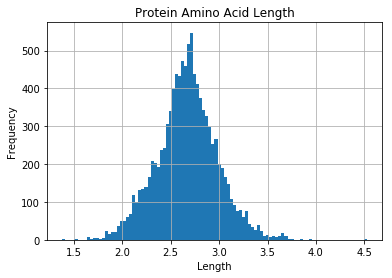

In [244]:
hist_plot = protseqb_length.hist(bins=100) 
hist_plot.set_title('Protein Amino Acid Length')
hist_plot.set_xlabel('Length')
hist_plot.set_ylabel('Frequency') 
# after normalization

In [245]:
protseq_binding.head(5) 

,protein,FASTA,length
0,9606.ENSP00000353915,MDKLDANVSSEEGFGSVEKVVLLTFLSTVILMAILGNLLVMVAVCW...,428
1,9606.ENSP00000256906,MPDTNSTINLSLSTRVTLAFFMSLVAFAIMLGNALVILAFVVDKNL...,390
2,9606.ENSP00000267377,MFPNGTASSPSSSPSPSPGSCGEGGGSRGPGAGAADGMEEPGRNAS...,391
3,9606.ENSP00000295589,MDVVDSLLVNGSNITPPCELGLENETLFCLDQPRPSKEWQPAVQIL...,428
4,9606.ENSP00000336630,MPIMGSSVYITVELAIAVLAILGNVLVCWAVWLNSNLQNVTNYFVV...,412


In [246]:
protseq_binding = protseq_binding.sort_values('length') 
protseq_binding.head(5) 
# sorts the length values in ascending order

,protein,FASTA,length
9200,9606.ENSP00000468991,MAPRGFSCLLLSTSEIDLPVKRRA,24
3728,9606.ENSP00000420821,MRAKWRKKRMRRLKRKRRKMRQRSK,25
9575,9606.ENSP00000440272,LTQGMDIQWMHVPGHSGFIGNEEADRLAREGASL,34
9535,9606.ENSP00000233143,MADKPDMGEIASFDKAKLKKTETQEKNTLPTKETIEQEKRSEIS,44
8617,9606.ENSP00000378430,MSDKPDMAEIEKFDKSKLKKTEMQEKNPLPSKETIEQEKQASES,44


In [247]:
protseq_binding = protseq_binding[protseq_binding['length'] > 50] 
protseq_binding = protseq_binding[protseq_binding['length'] < 20000] 
protseq_binding.reset_index() 
# keeps only rows with length values > 50 and < 20,000 and resets the index
# removed 12

,index,protein,FASTA,length
0,3286,9606.ENSP00000355315,MSSHKTFRIKRFLAKKQKQNRPIPQWIRMKTGNKIRYNSKRRHWRR...,51
1,3487,9606.ENSP00000243997,MVAYWRQAGLSYIRYSQICAKAVRDALKTEFKANAEKTSGSNVKIV...,51
2,1554,9606.ENSP00000296277,MSSHKTFTIKRFLAKKQKQNRPIPQWIQMKPGSKIRYNSKRRHWRR...,51
3,8804,9606.ENSP00000370414,MVAYWRQAGLSYIRYSQICAKVVRDALKTEFKANAKKTSGNSVKIV...,51
4,6443,9606.ENSP00000350132,MEKVQYLTRSAIRRASTIEMPQQARQKLQNLFINFCLILICLLLIC...,52
5,3656,9606.ENSP00000468280,STLSESANQVFLGFTYVAPSVLESVKEKFSFEPKIRSPRRFIGSPR...,54
6,8372,9606.ENSP00000468389,MNLERVSNEEKLNLCRKYYLGGFAFLPFLWLVNIFWFFREAFLVPA...,55
7,2355,9606.ENSP00000466420,MVTRFLGPRYRELVKNWVPTAYTWGAVGAVGLVWATDWRLILDWVP...,56
8,6268,9606.ENSP00000262946,MVTRFLGPRYRELVKNWVPTAYTWGAVGAVGLVWATDWRLILDWVP...,56
9,5953,9606.ENSP00000342889,MDTQKDVQPPKQQPMIYICGECHTENEIKSRDPIRCRECGYRIMYK...,58


In [248]:
protseq_binding.to_csv('protseq_binding.tsv', sep='\t') 
# now saves as tsv again, this is the version we are working with

Text(0,0.5,u'Frequency')

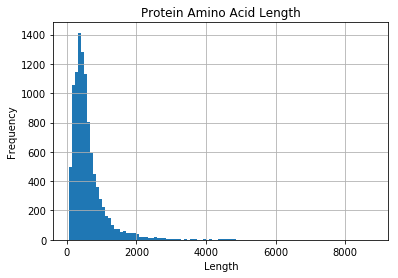

In [249]:
hist_plot = protseq_binding['length'].hist(bins=100) 
hist_plot.set_title('Protein Amino Acid Length')
hist_plot.set_xlabel('Length')
hist_plot.set_ylabel('Frequency') 
# checking how distribution changes after removing the lowest and highest

In [252]:
protseq_binding['length'].describe() 
# can see these numbers aren't so polar (before min=24 and max~33,000) 

count    10312.000000
mean       608.796742
std        553.787752
min         51.000000
25%        305.000000
50%        471.000000
75%        724.000000
max       8797.000000
Name: length, dtype: float64

In [250]:
normlength = np.log10(protseq_binding['length']) 

Text(0,0.5,u'Frequency')

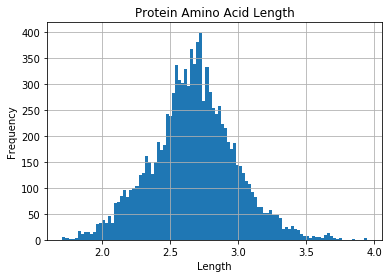

In [251]:
hist_plot = normlength.hist(bins=100) 
hist_plot.set_title('Protein Amino Acid Length')
hist_plot.set_xlabel('Length')
hist_plot.set_ylabel('Frequency')
# after normalization; distribution is less steep than before we removed values
# may need to remove more...